# Text Preprocessing and Classification

# Overview

In this project, we are required to work with a collection of tweets. The task is to predict the geolocation (country) where the tweet comes from. This project involves writing code to preprocess data and perform text classification.

# Part 1: Preprocessing

The following code loads the data from the JSON file. This produces two objects, `x` and `y`, which contains a list of tweets and corresponding country labels respectively.

In [ ]:
import json

x = []
y = []
data = json.load(open("data_project.json"))
for k, v in data.items():
    x.append(k)
    y.append(v)
    
print("Number of tweets =", len(x))
print("Number of labels =", len(y))
print("\nSamples of data:")
for i in range(10):
    print("Country =", y[i], "\tTweet =", x[i])
    
assert(len(x) == 943)
assert(len(y) == 943)

Number of tweets = 943
Number of labels = 943

Samples of data:
Country = us 	Tweet = @Addictd2Success thx u for following
Country = us 	Tweet = Let's just say, if I were to ever switch teams, Khalesi would be top of the list. #girlcrush
Country = ph 	Tweet = Taemin jonghyun!!! Your birits make me go~ http://t.co/le8z3dntlA
Country = id 	Tweet = depart.senior 👻 rapat perdana (with Nyayu, Anita, and 8 others at Ruang Aescullap FK Unsri Madang) — https://t.co/swRALlNkrQ
Country = ph 	Tweet = Done with internship with this pretty little lady!  (@ Metropolitan Medical Center w/ 3 others) [pic]: http://t.co/1qH61R1t5r
Country = gb 	Tweet = Wow just Boruc's clanger! Haha Sunday League stuff that, Giroud couldn't believe his luck! #clown
Country = my 	Tweet = I'm at Sushi Zanmai (Petaling Jaya, Selangor) w/ 5 others http://t.co/bcNobykZ
Country = us 	Tweet = Mega Fest!!!! Its going down🙏🙌  @BishopJakes
Country = gb 	Tweet = @EllexxxPharrell wow love the pic babe xx
Country = us 	Tweet = You 

### Task 1.1: Bag-of-Words Representation

Next we preprocess the collected tweets to create a bag-of-words representation based on frequency. The preprocessing steps required here are: 

1. Tokenize each tweet into individual word tokens (using NLTK `TweetTokenizer`)
2. Lowercase all words
3. Remove any word that does not contain any English letters in the alphabet (e.g. {_hello_, _#okay_, _abc123_} would be kept, but not {_123_, _!!_})  
4. Remove stopwords (based on NLTK `stopwords`). An empty tweet (after preprocessing) and its country label should be **excluded** from the output (`x_processed` and `y_processed`)

In [5]:
import nltk
#nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

tt = TweetTokenizer()
stopwords = set(stopwords.words('english')) #note: stopwords are all in lowercase

def preprocess_data(data, labels):
    
    ###
    # Your answer BEGINS HERE
    ###

    # Empty lists for processed data and processed label
    data_processed = []
    labels_processed = []

    # For each observation
    for i in range(len(data)):

        # Get the tweet (data) and country (label)
        tweet = data[i]
        country = labels[i]

        # Tokenize tweet into individual word tokens
        tweet = tt.tokenize(tweet)

        # Lowercase all words
        for i in range(len(tweet)):
            tweet[i] = tweet[i].lower()

        # Remove word that does not contain any English letters
        tweet_temp = []
        for word in tweet:
            for letter in word:
                if letter.isalpha():
                    tweet_temp.append(word)
                    break

        tweet = tweet_temp

        # Remove stopwords
        tweet_temp = []
        for word in tweet:
            if word not in stopwords:
                tweet_temp.append(word)

        tweet = tweet_temp

        # Retain only tweet lists that are not empty
        if len(tweet) > 0:
            tweet_dict = {}
            for word in tweet:
                if word in tweet_dict:
                    tweet_dict[word] += 1
                else:
                    tweet_dict[word] = 1
            data_processed.append(tweet_dict)
            labels_processed.append(country)

    # Return processed data list and processed label list
    return data_processed, labels_processed

    ###
    # Your answer ENDS HERE
    ###

x_processed, y_processed = preprocess_data(x, y)

print("Number of preprocessed tweets =", len(x_processed))
print("Number of preprocessed labels =", len(y_processed))
print("\nSamples of preprocessed data:")
for i in range(10):
    print("Country =", y_processed[i], "\tTweet =", x_processed[i])

Number of preprocessed tweets = 943
Number of preprocessed labels = 943

Samples of preprocessed data:
Country = us 	Tweet = {'@addictd2success': 1, 'thx': 1, 'u': 1, 'following': 1}
Country = us 	Tweet = {"let's": 1, 'say': 1, 'ever': 1, 'switch': 1, 'teams': 1, 'khalesi': 1, 'would': 1, 'top': 1, 'list': 1, '#girlcrush': 1}
Country = ph 	Tweet = {'taemin': 1, 'jonghyun': 1, 'birits': 1, 'make': 1, 'go': 1, 'http://t.co/le8z3dntla': 1}
Country = id 	Tweet = {'depart.senior': 1, 'rapat': 1, 'perdana': 1, 'nyayu': 1, 'anita': 1, 'others': 1, 'ruang': 1, 'aescullap': 1, 'fk': 1, 'unsri': 1, 'madang': 1, 'https://t.co/swrallnkrq': 1}
Country = ph 	Tweet = {'done': 1, 'internship': 1, 'pretty': 1, 'little': 1, 'lady': 1, 'metropolitan': 1, 'medical': 1, 'center': 1, 'w': 1, 'others': 1, 'pic': 1, 'http://t.co/1qh61r1t5r': 1}
Country = gb 	Tweet = {'wow': 1, "boruc's": 1, 'clanger': 1, 'haha': 1, 'sunday': 1, 'league': 1, 'stuff': 1, 'giroud': 1, 'believe': 1, 'luck': 1, '#clown': 1}
Countr

**Instructions**: Hashtags (i.e. topic tags which start with #) pose an interesting tokenisation problem because they often include multiple words written without spaces or capitalization. Run the code below to collect all unique hashtags in the preprocessed data. **No implementation is needed.**



In [7]:
def get_all_hashtags(data):
    hashtags = set([])
    for d in data:
        for word, frequency in d.items():
            if word.startswith("#") and len(word) > 1:
                hashtags.add(word)
    return hashtags

hashtags = get_all_hashtags(x_processed)
print("Number of hashtags =", len(hashtags))
print(sorted(hashtags))

Number of hashtags = 425
['#100percentpay', '#1stsundayofoctober', '#1yearofalmostisneverenough', '#2011prdctn', '#2015eebritishfilmacademyawards', '#2k16', '#2littlebirds', '#365picture', '#5sosacousticatlanta', '#5sosfam', '#8thannualpubcrawl', '#affsuzukicup', '#aflpowertigers', '#ahimacon14', '#aim20', '#airasia', '#allcity', '#alliswell', '#allwedoiscurls', '#amazing', '#anferneehardaway', '#ariona', '#art', '#arte', '#artwork', '#ashes', '#asian', '#asiangirl', '#askcrawford', '#askherforfback', '#askolly', '#asksteven', '#at', '#australia', '#awesome', '#awesomepict', '#barcelona', '#bart', '#bayofislands', '#beautiful', '#bedimages', '#bell', '#beringmy', '#bettybooppose', '#bff', '#big', '#bigbertha', '#bigbreakfast', '#blackhat', '#blessedmorethanicanimagine', '#blessedsunday', '#blogtourambiente', '#bluemountains', '#bonekachika', '#boomtaob', '#booyaa', '#bored', '#boredom', '#bradersisterhood', '#breaktime', '#breedingground', '#bringithomemy', '#brooksengland', '#burgers'

### Task 1.2: Hashtags Tokenization

**Instructions**: Our task here to tokenize the hashtags, by implementing the **MaxMatch algorithm** discussed in class.

NLTK has a list of words that you can use for matching, see starter code below (`words`). Be careful about efficiency with respect to doing word lookups. One extra challenge you have to deal with is that the provided list of words (`words`) includes only lemmas: your MaxMatch algorithm should match inflected forms by converting them into lemmas using the NLTK lemmatizer before matching (provided by the function `lemmatize(word)`). Note that the list of words (`words`) is the only source that you'll use for matching (i.e. you do not need to find  other external word lists). If you are unable to make any longer match, your code should default to matching a single letter.

For example, given "#newrecords", the algorithm should produce: \["#", "new", "records"\].

**Task**: Complete the `tokenize_hashtags(hashtags)` function by implementing the MaxMatch algorithm. The function takes as input **a set of hashtags**, and returns **a dictionary** where key="hashtag" and value="a list of tokenised words".

**Check**: Use the assertion statements in <b>"For your testing"</b> below for the expected output.

In [8]:
from nltk.corpus import wordnet
#nltk.download('words')
#nltk.download('wordnet')

lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
words = set(nltk.corpus.words.words()) #a list of words provided by NLTK
words = set([ word.lower() for word in words ]) #lowercase all the words for better matching

def lemmatize(word):
    lemma = lemmatizer.lemmatize(word,'v')
    if lemma == word:
        lemma = lemmatizer.lemmatize(word,'n')
    return lemma


def tokenize_hashtags(hashtags):
    ###
    # Your answer BEGINS HERE
    ###

    # Empty dictionary for hashtags
    hashtags_dict = {}

    # Calculate maximum length
    # Here we can only get the maximum length of lemmatized words
    # We assume that the maximum length of lemmatized words equals to that of original words
    max_length = 0
    for w in words:
        if len(w) > max_length:
            max_length = len(w)

    # For each hashtag
    for hashtag in hashtags:

        # Create an empty sub token list
        token_list = []

        # Set initial start index and end index
        start_index = 0
        end_index = start_index + max_length

        # While it does not get to the end of the word, do:
        while start_index <= len(hashtag):

            # While the lemmatized sub token is not in words and the original sub token is not a single letter
            while lemmatize(hashtag[start_index:end_index]) not in words and len(hashtag[start_index:end_index]) > 1:

                # Move end index ahead
                end_index -= 1

            # If the lemmatized sub token is in words or the original sub token is a single letter
            # append original sub token it into sub token list
            token_list.append(hashtag[start_index:end_index])

            # Reset start index and end index
            start_index = end_index
            end_index = max(start_index + max_length, len(hashtag))

        # Add sub token list into dictionary
        hashtags_dict[hashtag] = token_list

    # Return dictionary for hashtags
    return hashtags_dict

    ###
    # Your answer ENDS HERE
    ###

#tokenise hashtags with MaxMatch
tokenized_hashtags = tokenize_hashtags(hashtags)

#print results
for k, v in sorted(tokenized_hashtags.items())[-30:]:
    print(k, v)

#vanilla ['#', 'vanilla']
#vca ['#', 'v', 'ca']
#vegan ['#', 'vega', 'n']
#veganfood ['#', 'vega', 'n', 'food']
#vegetables ['#', 'vegetables']
#vegetarian ['#', 'vegetarian']
#video ['#', 'video']
#vma ['#', 'v', 'ma']
#voteonedirection ['#', 'vote', 'one', 'direction']
#vsco ['#', 'vs', 'c', 'o']
#vscocam ['#', 'vs', 'coca', 'm']
#walking ['#', 'walking']
#watch ['#', 'watch']
#weare90s ['#', 'wear', 'e', '9', '0', 's']
#wearesocial ['#', 'weares', 'o', 'c', 'i', 'al']
#white ['#', 'white']
#wings ['#', 'wings']
#wok ['#', 'wo', 'k']
#wood ['#', 'wood']
#work ['#', 'work']
#workmates ['#', 'work', 'mates']
#world ['#', 'world']
#worldcup2014 ['#', 'world', 'cup', '2', '0', '1', '4']
#yellow ['#', 'yellow']
#yiamas ['#', 'y', 'i', 'ama', 's']
#ynwa ['#', 'yn', 'wa']
#youtube ['#', 'you', 'tube']
#yummy ['#', 'yummy']
#yws13 ['#', 'y', 'ws', '1', '3']
#zweihandvollfarm ['#', 'z', 'wei', 'hand', 'vol', 'l', 'farm']


### Task 1.3: Hashtags Tokenization - Reversed MaxMatch

**Instructions**: Our next task is to tokenize the hashtags again, but this time using a **reversed version of the MaxMatch algorithm**, where matching begins at the end of the hashtag and progresses backwards (e.g. for <i>#helloworld</i>, we would process it right to left, starting from the last character <i>d</i>). Just like before, you should use the provided word list (`words`) for word matching.

**Task**: Complete the `tokenize_hashtags_rev(hashtags)` function by the MaxMatch algorithm. The function takes as input **a set of hashtags**, and returns **a dictionary** where key="hashtag" and value="a list of tokenised words".

**Check**: Use the assertion statements in <b>"For your testing"</b> below for the expected output.

In [ ]:
def tokenize_hashtags_rev(hashtags):
    ###
    # Your answer BEGINS HERE
    ###

    # Empty dictionary for hashtags
    hashtags_dict = {}

    # Calculate maximum length
    # Here we can only get the maximum length of lemmatized words
    # We assume that the maximum length of lemmatized words equals to that of original words
    max_length = 0
    for w in words:
        if len(w) > max_length:
            max_length = len(w)

    # For each hashtag
    for hashtag in hashtags:

        # Create an empty sub token list
        token_list = []

        # Set initial start index and end index
        end_index = len(hashtag)
        start_index = max(end_index - max_length, 0)

        # While it does not get to the beginning of the word, do:
        while end_index > 0:

            # While the lemmatized sub token is not in words and the original sub token not a single letter
            while lemmatize(hashtag[start_index:end_index]) not in words and len(hashtag[start_index:end_index]) > 1:

                # Move start index back
                start_index += 1

            # If the lemmatized sub token is in words or the original sub token is a single letter
            # append original sub token it into sub token list
            token_list.append(hashtag[start_index:end_index])

            # Reset start index and end index
            end_index = start_index
            start_index = max(end_index - max_length, 0)

        # Reverse the sub token list and add sub token list into dictionary
        token_list = token_list[::-1]
        hashtags_dict[hashtag] = token_list

    # Return dictionary for hashtags
    return hashtags_dict

    ###
    # Your answer ENDS HERE
    ###

#tokenise hashtags with the reversed version of MaxMatch
tokenized_hashtags_rev = tokenize_hashtags_rev(hashtags)

#print results
for k, v in sorted(tokenized_hashtags_rev.items())[-30:]:
    print(k, v)

#vanilla ['#', 'vanilla']
#vca ['#', 'v', 'ca']
#vegan ['#', 'v', 'e', 'gan']
#veganfood ['#', 'v', 'e', 'gan', 'food']
#vegetables ['#', 'vegetables']
#vegetarian ['#', 'vegetarian']
#video ['#', 'video']
#vma ['#', 'v', 'ma']
#voteonedirection ['#', 'vote', 'one', 'direction']
#vsco ['#', 'vs', 'c', 'o']
#vscocam ['#', 'vs', 'c', 'o', 'cam']
#walking ['#', 'walking']
#watch ['#', 'watch']
#weare90s ['#', 'we', 'are', '9', '0', 's']
#wearesocial ['#', 'we', 'are', 'social']
#white ['#', 'white']
#wings ['#', 'wings']
#wok ['#', 'w', 'ok']
#wood ['#', 'wood']
#work ['#', 'work']
#workmates ['#', 'work', 'mates']
#world ['#', 'world']
#worldcup2014 ['#', 'world', 'cup', '2', '0', '1', '4']
#yellow ['#', 'yellow']
#yiamas ['#', 'y', 'i', 'a', 'mas']
#ynwa ['#', 'yn', 'wa']
#youtube ['#', 'you', 'tube']
#yummy ['#', 'yummy']
#yws13 ['#', 'y', 'ws', '1', '3']
#zweihandvollfarm ['#', 'z', 'wei', 'hand', 'vol', 'l', 'farm']


**For your testing:**

In [11]:
assert(len(tokenized_hashtags_rev) == len(hashtags))
assert(tokenized_hashtags_rev["#newrecord"] == ["#", "new", "record"])

### Task 1.4: Unigram Language Model for Hashtag Scoring

**Instructions**: The two versions of MaxMatch will produce different results for some of the hashtags. For a hastag that has different results, our task here is to use a **unigram language model** (lecture 3) to score them to see which is better. Recall that in a unigram language model we compute P(<i>#</i>, <i>hello</i>, <i>world</i> = P(<i>#</i>)\*P(<i>hellow</i>)\*P(<i>world</i>).

You should: (1) use the NLTK's Brown corpus (`brown_words`) for collecting word frequencies (note: the words are already tokenised so no further tokenisation is needed); (2) lowercase all words in the corpus; (3) use add-one smoothing when computing the unigram probabilities; and (4) work in the log space to prevent numerical underflow.

**Task**: Build a unigram language model with add-one smoothing using the word counts from the Brown corpus. Iterate through the hashtags, and for each hashtag where MaxMatch and reversed MaxMatch produce different results, print the following: (1) the hashtag; (2) the results produced by MaxMatch and reversed MaxMatch; and (3) the log probability of each result as given by the unigram language model. Note: you **do not** need to print the hashtags where MaxMatch and reversed MaxMatch produce the same results.

An example output:
```
1. #abcd
MaxMatch = [#, a, bc, d]; LogProb = -2.3
Reversed MaxMatch = [#, a, b, cd]; LogProb = -3.5

2. #efgh
MaxMatch = [#, ef, g, h]; LogProb = -4.2
Reversed MaxMatch = [#, e, fgh]; LogProb = -3.1

```

Have a look at the output, and see if the sequences with better language model scores (i.e. less negative) are generally more coherent.

In [12]:
from nltk.corpus import brown

#words from brown corpus
brown_words = brown.words()

###
# Your answer BEGINS HERE
###
import math

# Create a dictionary that count the frequency of each words in brown corpus
word_count_dict = dict()
for word in brown_words:
    word = word.lower()
    if word in word_count_dict:
        word_count_dict[word] += 1
    else:
        word_count_dict[word] = 1

# Calculate number of words in corpus and number of distinct words in corpus
M = len(brown_words)
V = len(word_count_dict)

# Create an index for hashtags to be shown
number = 1

# For each hashtag
for hashtag in sorted(list(hashtags)):

    # Get the sub token lists in normal order and reversed order
    norm_token = tokenized_hashtags[hashtag]
    revs_token = tokenized_hashtags_rev[hashtag]

    # If two lists are different
    if norm_token != revs_token:

        # Calculate probability of normal order sub token list
        norm_prob = 1
        for token in norm_token:
            if token in word_count_dict:
                norm_prob *= (word_count_dict[token] + 1) / (M + V)
            else:
                norm_prob *= (0 + 1) / (M + V)

        # Calculate probability of reverse order sub token list
        revs_prob = 1
        for token in revs_token:
            if token in word_count_dict:
                revs_prob *= (word_count_dict[token] + 1) / (M + V)
            else:
                revs_prob *= (0 + 1) / (M + V)

        # Show the hashtag name and probability for normal order sub token list and reverse order sub token list
        print(str(number) + ". " + hashtag)
        print("MaxMatch = " + str(norm_token) + "; LogProb = " + str(round(math.log(norm_prob),1)))
        print("Reversed MaxMatch = " + str(revs_token) + "; LogProb = " + str(round(math.log(revs_prob),1)))
        print()

        # Update the index
        number += 1

###
# Your answer ENDS HERE
###

1. #1stsundayofoctober
MaxMatch = ['#', '1', 'st', 'sunday', 'ofo', 'c', 'tobe', 'r']; LogProb = -92.7
Reversed MaxMatch = ['#', '1', 'st', 'sunday', 'of', 'october']; LogProb = -58.7

2. #1yearofalmostisneverenough
MaxMatch = ['#', '1', 'year', 'of', 'almost', 'is', 'never', 'enough']; LogProb = -60.9
Reversed MaxMatch = ['#', '1', 'year', 'of', 'al', 'mos', 'tis', 'never', 'enough']; LogProb = -86.9

3. #8thannualpubcrawl
MaxMatch = ['#', '8', 'than', 'nu', 'alp', 'u', 'b', 'crawl']; LogProb = -90.1
Reversed MaxMatch = ['#', '8', 'th', 'annual', 'pub', 'crawl']; LogProb = -71.6

4. #affsuzukicup
MaxMatch = ['#', 'a', 'f', 'fs', 'u', 'z', 'u', 'k', 'i', 'cup']; LogProb = -104.6
Reversed MaxMatch = ['#', 'a', 'f', 'f', 'suz', 'u', 'k', 'i', 'cup']; LogProb = -91.4

5. #ahimacon14
MaxMatch = ['#', 'ah', 'ima', 'con', '1', '4']; LogProb = -67.2
Reversed MaxMatch = ['#', 'a', 'hi', 'macon', '1', '4']; LogProb = -58.8

6. #alliswell
MaxMatch = ['#', 'all', 'is', 'well']; LogProb = -32.0
Re

# Part 2: Text Classification

### Question 5 (1.0 mark)

**Instructions**: Here we are interested to do text classification, to predict the country of origin of a given tweet. The task here is to create training, development and test partitions from the preprocessed data (`x_processed`) and convert the bag-of-words representation into feature vectors.

**Task**: Create training, development and test partitions with a 70%/15%/15% ratio. Remember to preserve the ratio of the classes for all your partitions. That is, say we have only 2 classes and 70% of instances are labelled class A and 30% of instances are labelled class B, then the instances in training, development and test partitions should also preserve this 7:3 ratio. You may use sklearn's builtin functions for doing data partitioning.

Next, turn the bag-of-words dictionary of each tweet into a feature vector. You may also use sklearn's builtin functions for doing this (but if you don't want to use sklearn that's fine).

You should produce 6 objects: `x_train`, `x_dev`, `x_test` which contain the input feature vectors, and `y_train`, `y_dev` and `y_test` which contain the labels.

In [13]:
from sklearn.feature_extraction import DictVectorizer

x_train, x_dev, x_test = None, None, None
y_train, y_dev, y_test = None, None, None

###
# Your answer BEGINS HERE
###

import random

# Create empty list for training, development, and testing set
x_train, x_dev, x_test = [], [], []
y_train, y_dev, y_test = [], [], []

# Data partitioning
for i in range(len(x_processed)):

    # Get a random number
    randon_number = random.uniform(0,1)

    # Put into training set with prob 0.7
    if randon_number < 0.7:
        x_train.append(x_processed[i])
        y_train.append(y_processed[i])

    # Put into development set with prob 0.15
    elif 0.7 <= randon_number < 0.85:
        x_dev.append(x_processed[i])
        y_dev.append(y_processed[i])

    # Put into test set with prob 0.15
    else:
        x_test.append(x_processed[i])
        y_test.append(y_processed[i])

# Turn bag-of-words dictionary into feature vectors
vectorizer = DictVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_dev = vectorizer.transform(x_dev)
x_test = vectorizer.transform(x_test)

###
# Your answer ENDS HERE
###

### Question 6 (1.0 mark)

**Instructions**: Now, let's build some classifiers. Here, we'll be comparing Naive Bayes and Logistic Regression. For each, you need to first find a good value for their main regularisation hyper-parameters, which you should identify using the scikit-learn docs or other resources. Use the development set you created for this tuning process; do **not** use cross-validation in the training set, or involve the test set in any way. You don't need to show all your work, but you do need to print out the **accuracy** with enough different settings to strongly suggest you have found an optimal or near-optimal choice. We should not need to look at your code to interpret the output.

**Task**: Implement two text classifiers: Naive Bayes and Logistic Regression. Tune the hyper-parameters of these classifiers and print the task performance (accuracy) for different hyper-parameter settings.

Hyperparameter selection for Naive Bayes classifier:
The optimal hyperparameter alpha is: 0.2, with accuracy: 0.32.


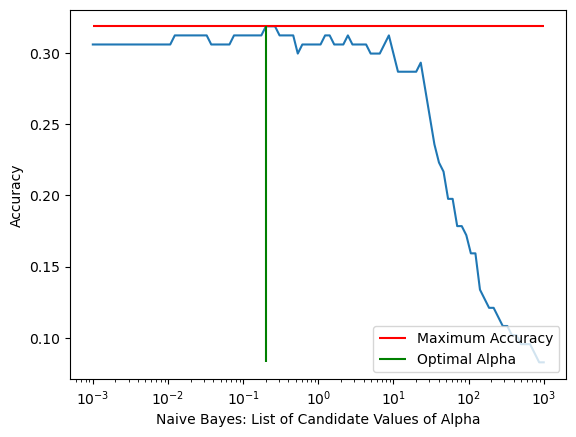

Hyperparameter selection for Logistic Regression classifier:
The optimal hyperparameter C is: 0.4, with accuracy: 0.33.


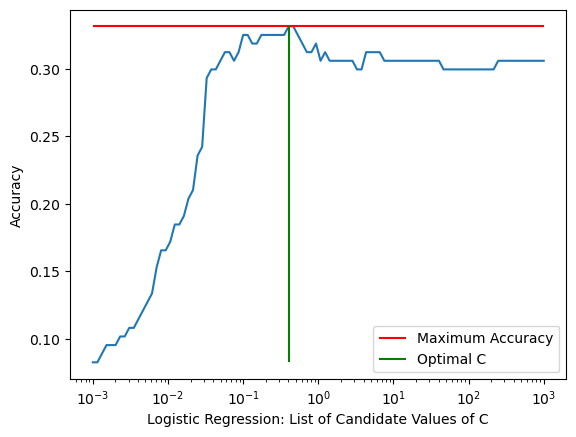

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

###
# Your answer BEGINS HERE
###

import numpy as np
import matplotlib.pyplot as plt

# Set a maximum number of candidate hyperparameters in both cases
k = 100

# 1. Naive Bayes Classifier
# Create a list of candidate alpha and a list of accuracy values corresponding to alpha
nb_alpha_candidates = np.logspace(-3, 3, k)
nb_accuracy_list = []

# Train NB classifier for each candidate alpha and calculate accuracy by development set
for i in range(k):
    nb = MultinomialNB(alpha=nb_alpha_candidates[i])
    nb.fit(x_train, y_train)
    y_dev_pred_nb = nb.predict(x_dev)
    nb_accuracy_list.append(accuracy_score(y_dev, y_dev_pred_nb))

# Get maximum accuracy and optimal alpha and print the result
nb_optimal_accuracy = np.max(nb_accuracy_list)
nb_optimal_alpha = nb_alpha_candidates[np.argmax(nb_accuracy_list)]

print("Hyperparameter selection for Naive Bayes classifier:")
print("The optimal hyperparameter alpha is: " + str(round(nb_optimal_alpha,2)) +
      ", with accuracy: " + str(round(nb_optimal_accuracy,2)) + ".")

# Use plot to show how accuracy change w.r.t. alpha change
plt.plot(nb_alpha_candidates, nb_accuracy_list)
plt.xscale("log")
plt.hlines(y = np.max(nb_accuracy_list),
           xmin = np.min(nb_alpha_candidates), xmax = np.max(nb_alpha_candidates),
           colors = 'red', label = 'Maximum Accuracy')
plt.vlines(x = nb_alpha_candidates[np.argmax(nb_accuracy_list)],
           ymin = np.min(nb_accuracy_list), ymax = np.max(nb_accuracy_list),
           colors = 'green', label = 'Optimal Alpha')
plt.xlabel("Naive Bayes: List of Candidate Values of Alpha")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

# 2. Logistic Regression Classifier
# Create a list of candidate C and a list of accuracy values corresponding to C
lr_c_candidates = np.logspace(-3, 3, k)
lr_accuracy_list = []

# Train Logistic Regression classifier for each candidate C and calculate accuracy by development set
for i in range(k):
    lr = LogisticRegression(C=lr_c_candidates[i])
    lr.fit(x_train, y_train)
    y_dev_pred_lr = lr.predict(x_dev)
    lr_accuracy_list.append(accuracy_score(y_dev, y_dev_pred_lr))

# Get maximum accuracy and optimal C and print the result
lr_optimal_accuracy = np.max(lr_accuracy_list)
lr_optimal_c = lr_c_candidates[np.argmax(lr_accuracy_list)]

print("Hyperparameter selection for Logistic Regression classifier:")
print("The optimal hyperparameter C is: " + str(round(lr_optimal_c,2)) +
      ", with accuracy: " + str(round(lr_optimal_accuracy,2)) + ".")

# Use plot to show how accuracy change w.r.t. C change
plt.plot(lr_c_candidates, lr_accuracy_list)
plt.xscale("log")
plt.hlines(y = np.max(lr_accuracy_list),
           xmin = np.min(lr_c_candidates), xmax = np.max(lr_c_candidates),
           colors = 'red', label = 'Maximum Accuracy')
plt.vlines(x = lr_c_candidates[np.argmax(lr_accuracy_list)],
           ymin = np.min(lr_accuracy_list), ymax = np.max(lr_accuracy_list),
           colors = 'green', label = 'Optimal C')
plt.xlabel("Logistic Regression: List of Candidate Values of C")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

###
# Your answer ENDS HERE
###

### Question 7 (1.0 mark)

**Instructions**: Using the best settings you have found, compare the two classifiers based on performance in the test set. Print out both **accuracy** and **macro-averaged F-score** for each classifier. Be sure to label your output. You may use sklearn's inbuilt functions.

**Task**: Compute test performance in terms of accuracy and macro-averaged F-score for both Naive Bayes and Logistic Regression, using their optimal hyper-parameter settings based on their development performance.

In [15]:
###
# Your answer BEGINS HERE
###

from sklearn.metrics import f1_score

# Optimal Naive Bayes Classifier
nb_opt = MultinomialNB(alpha=nb_optimal_alpha)  # Optimal nb classifier
nb_opt.fit(x_train, y_train)  # Train the optimal nb classifier
y_test_pred_nb = nb_opt.predict(x_test)  # Prediction on test set
nb_accuracy = accuracy_score(y_test, y_test_pred_nb)  # Calculate accuracy
nb_f1_score = f1_score(y_test, y_test_pred_nb, average="macro")  # Calculate F1 score

print("Performance of Optimal Naive Bayes Classifier:")
print("Accuracy:", round(nb_accuracy, 2))
print("F1 Score:", round(nb_f1_score, 2))
print()

# Optimal Logistic Regression Classifier
lr_opt = LogisticRegression(C=lr_optimal_c)  # Optimal lr classifier
lr_opt.fit(x_train, y_train)  # Train the optimal lr classifier
y_test_pred_lr = lr_opt.predict(x_test)  # Prediction on test set
lr_accuracy = accuracy_score(y_test, y_test_pred_lr)  # Calculate accuracy
lr_f1_score = f1_score(y_test, y_test_pred_lr, average="macro")  # Calculate F1 score

print("Performance of Optimal Logistic Regression Classifier:")
print("Accuracy:", round(lr_accuracy, 2))
print("F1 Score:", round(lr_f1_score, 2))

###
# Your answer ENDS HERE
###

Performance of Optimal Naive Bayes Classifier:
Accuracy: 0.26
F1 Score: 0.25

Performance of Optimal Logistic Regression Classifier:
Accuracy: 0.3
F1 Score: 0.3


### Question 8 (1.0 mark)

**Instructions**: Print the most important features and their weights for each class for the two classifiers.


**Task**: For each of the classifiers (Logistic Regression and Naive Bayes) you've built in the previous question, print out the top-20 features (words) with the highest weight for each class (countries).

An example output:
```
Classifier = Logistic Regression

Country = au
aaa (0.999) bbb (0.888) ccc (0.777) ...

Country = ca
aaa (0.999) bbb (0.888) ccc (0.777) ...

Classifier = Naive Bayes

Country = au
aaa (-1.0) bbb (-2.0) ccc (-3.0) ...

Country = ca
aaa (-1.0) bbb (-2.0) ccc (-3.0) ...
```

Have a look at the output, and see if you notice any trend/pattern in the words for each country.

In [16]:
###
# Your answer BEGINS HERE
###

# Get the list of country and the list of feature
country_list = lr_opt.classes_
feature_list = vectorizer.feature_names_

# Logistic Regression: Feature importance measured by feature coefficient estimation
print("Classifier = Logistic Regression")
print()

# Get the coefficient estimate for each country and rank by index
lr_coef = lr_opt.coef_
lr_coef_rank = np.argsort(lr_coef, axis=1)

# For each country
for i in range(len(country_list)):
    print("Country =", country_list[i])
    lr_coef_i = lr_coef[i]  # Coefficient estimation
    lr_coef_rank_i = lr_coef_rank[i][::-1]  # Ranked coefficient by index
    for j in range(20):  # Extract the top 20 coefficient and corresponding feature name
        word_index = lr_coef_rank_i[j]
        word = feature_list[word_index]
        coef = lr_coef_i[word_index]
        print(str(word) + "(" + str(round(coef,3)) + ") ", end = " ")
    print("\n")

# Naive Bayes: Feature importance measured by feature probability estimation
print("Classifier = Naive Bayes")
print()

# Get the log probability estimate for each country and rank by index
nb_coef = nb_opt.feature_log_prob_
nb_coef_rank = np.argsort(nb_coef, axis=1)

# For each country
for i in range(len(country_list)):
    print("Country =", country_list[i])
    nb_coef_i = nb_coef[i]  # Log probability estimation
    nb_coef_rank_i = nb_coef_rank[i][::-1]  # Ranked log probability by index
    for j in range(20):  # Extract the top 20 log probability and corresponding feature name
        word_index = nb_coef_rank_i[j]
        word = feature_list[word_index]
        coef = nb_coef_i[word_index]
        print(str(word) + "(" + str(round(coef,1)) + ") ", end = " ")
    print("\n")
###
# Your answer ENDS HERE
###

Classifier = Logistic Regression

Country = au
australia(1.025)  melbourne(0.583)  @micksunnyg(0.527)  great(0.5)  australian(0.475)  victoria(0.457)  little(0.442)  #sunrise(0.438)  something(0.42)  tomorrow(0.42)  hey(0.417)  someone(0.405)  keep(0.404)  finished(0.391)  though(0.385)  one(0.372)  #affsuzukicup(0.37)  #mtvhottest(0.369)  forward(0.365)  even(0.337)  

Country = ca
thing(0.71)  first(0.563)  happen(0.518)  hate(0.508)  next(0.487)  big(0.455)  like(0.443)  maybe(0.439)  finally(0.438)  one(0.437)  later(0.408)  awesome(0.402)  let's(0.393)  data(0.383)  made(0.378)  found(0.364)  without(0.363)  looks(0.362)  think(0.35)  learning(0.347)  

Country = de
posted(0.696)  photo(0.696)  enough(0.617)  germany(0.578)  mkmedi(0.466)  remstal(0.466)  kernen(0.466)  photodesign(0.466)  done(0.457)  factory(0.453)  could(0.446)  bad(0.44)  painting(0.429)  krefeld(0.408)  miss(0.394)  never(0.371)  @fabiomarabini(0.358)  almost(0.35)  love(0.345)  please(0.342)  

Country = gb
